<a href="https://colab.research.google.com/github/nrutyadoshi/PM/blob/master/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
url = "https://raw.githubusercontent.com/reubence/PM/master/CRM_TrainData.csv"
data = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,a3fdf1db-e991-4293-976c-7d35564c0aec,74561f96-304a-492d-bc19-a6107d2afee9,Charged Off,10120,Long Term,6920.0,10+ years,Rent,47564.0,Debt Consolidation,990.92,21.8,28.0,10,0,3840,7694,0.0,0.0
1,c3f8006d-d1ef-4a94-ba55-c48034974205,b8e70101-dd49-4a39-84a6-5f92b390684c,Fully Paid,7144,Short Term,721.0,2 years,Home Mortgage,40820.0,Debt Consolidation,574.88,10.7,NaN,6,0,13269,22565,0.0,0.0
2,076b722f-3658-47a8-a7f1-5179a9b45ade,0a28e046-9239-4ee0-8770-68a2f72bf2a0,Fully Paid,10100,Short Term,726.0,7 years,Own Home,54540.0,Debt Consolidation,577.22,37.3,NaN,6,0,5373,8667,0.0,0.0
3,c2d68e37-572b-4a3b-afaa-b55a679c7d67,dc755ef2-1773-4d3b-8b6b-668bbae290c5,Fully Paid,30362,Long Term,708.0,1 year,Home Mortgage,63450.0,Debt Consolidation,1110.37,12.5,52.0,14,0,38329,57207,0.0,0.0
4,c02558d1-58cb-4b36-9569-ae55baeb328a,f0804ea2-249b-4e6c-ab2a-1554a7ff6a5b,Fully Paid,3571,Short Term,700.0,5 years,Home Mortgage,41370.0,Debt Consolidation,875.67,13.1,6.0,4,0,384,985,0.0,0.0


In [0]:
data.drop(["Loan ID", "Customer ID"], 1, inplace = True)

In [0]:
data.dtypes

Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

EDA

In [0]:
def clean_int(str): 
  import re
  str1 = re.findall(r'[0-9]+',str) # will take only digits
  str2 = ' '.join([elem for elem in str1]) 
  str3 = int(str2)
  return (str3)

In [0]:
# as the data present in the column has string value also 
cnt=0
for row in data['Years in current job']:
  try:
    data.loc[cnt, 'Years in current job'] = clean_int(row) 
  except:
    data.loc[cnt, 'Years in current job'] = np.nan # as na values are also present
  cnt+=1

In [0]:
def clean_float(str): 
  import re
  str1 = re.findall(r'[0-9]+[.0-9]*',str)
  str2 = ' '.join([elem for elem in str1]) 
  str3 = float(str2)
  return (str3)

In [0]:
cnt=0
for row in data['Monthly Debt']:
    try:
        data.loc[cnt, 'Monthly Debt'] = float(row) 
    except:
        data.loc[cnt, 'Monthly Debt'] = clean_float(row)
    cnt+=1

In [0]:
data["Monthly Debt"] = data.apply(lambda row: float(row["Monthly Debt"]),axis=1)

In [0]:
cnt=0
for row in data['Maximum Open Credit']:
    try:
      data.loc[cnt, 'Maximum Open Credit'] = clean_int(row) 
    except:
      data.loc[cnt, 'Maximum Open Credit'] = np.nan
    cnt+=1

In [0]:
data.dtypes

Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [0]:
cnt=0
for row in data['Purpose']:
    if row in ("Other", "other", "renewable_energy", "major_purchase"):
        data.loc[cnt, 'Purpose'] = "Other"
    elif row in ("Debt Consolidation"):
        data.loc[cnt, 'Purpose'] = "Debt"
    elif row in ("Home Improvements", "Buy House", "moving"):
        data.loc[cnt, 'Purpose'] = "Home"
    elif row in ("Business Loan", "small_business"):
        data.loc[cnt, 'Purpose'] = "Business"
    elif row in ("Buy a Car", "small_business"):
        data.loc[cnt, 'Purpose'] = "Car"
    elif row in ("Medical Bills"):
        data.loc[cnt, 'Purpose'] = "Medical"
    elif row in ("Take a Trip", "vacation"):
        data.loc[cnt, 'Purpose'] = "Vacation"
    elif row in ("wedding"):
        data.loc[cnt, 'Purpose'] = "Wedding"
    elif row in ("Educational Expenses"):
        data.loc[cnt, 'Purpose'] = "Education"
    cnt+=1

In [0]:
data['Purpose'].value_counts()

Debt         60995
Other         7541
Home          5261
Business      1458
Car           1027
Medical        852
Vacation       523
Wedding         89
Education       77
Name: Purpose, dtype: int64

Filling NAN values

In [0]:
data['Years in current job'] = data['Years in current job'].fillna(data['Years in current job'].median())

In [0]:
data['Maximum Open Credit'] = data['Maximum Open Credit'].fillna(data['Maximum Open Credit'].median())

In [0]:
data['Credit Score'] = data['Credit Score'].fillna(data['Credit Score'].median())

In [0]:
data['Annual Income'] = data['Annual Income'].fillna(data['Annual Income'].median())

In [0]:
data['Months since last delinquent'] = data['Months since last delinquent'].fillna(data['Months since last delinquent'].median())

In [0]:
data['Bankruptcies'] = data['Bankruptcies'].fillna(data['Bankruptcies'].median())
data['Tax Liens'] = data['Tax Liens'].fillna(data['Tax Liens'].median())

In [0]:
data.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [0]:
data.dtypes

Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job            float64
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
label = LabelEncoder()

In [0]:
data.dtypes

Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job            float64
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [0]:
data['Loan Status'] = label.fit_transform(data['Loan Status'])
data['Term'] = label.fit_transform(data['Term'])

In [0]:
data['Home Ownership'] = label.fit_transform(data['Home Ownership'])
data['Purpose'] = label.fit_transform(data['Purpose'])

In [0]:
data = pd.get_dummies(data = data, columns = ["Home Ownership", "Purpose"])

In [0]:
data.dtypes

Loan Status                       int64
Current Loan Amount               int64
Term                              int64
Credit Score                    float64
Years in current job            float64
Annual Income                   float64
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
Home Ownership_0                  uint8
Home Ownership_1                  uint8
Home Ownership_2                  uint8
Home Ownership_3                  uint8
Purpose_0                         uint8
Purpose_1                         uint8
Purpose_2                         uint8
Purpose_3                         uint8
Purpose_4                         uint8
Purpose_5                         uint8


In [0]:
X = data.drop(["Loan Status"],1)
Y = data["Loan Status"]

In [0]:
columns = X.columns

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
X = pd.DataFrame(scaler.fit_transform(X), columns=columns)
X.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_0,Home Ownership_1,Home Ownership_2,Home Ownership_3,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8
0,0.000092,0.0,0.914801,1.000000,0.004971,0.043198,0.308998,0.159091,0.131579,0.0,0.002219,0.000294,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000063,1.0,0.019639,0.111111,0.004197,0.025061,0.120543,0.181818,0.078947,0.0,0.007668,0.000294,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000092,1.0,0.020361,0.666667,0.005772,0.025163,0.572156,0.181818,0.078947,0.0,0.003105,0.000294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000295,0.0,0.017762,0.000000,0.006795,0.048405,0.151104,0.295455,0.184211,0.0,0.022149,0.000294,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000027,1.0,0.016606,0.444444,0.004260,0.038174,0.161290,0.034091,0.052632,0.0,0.000222,0.000294,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.2, random_state = 42)

In [0]:
train = pd.concat([X_train, Y_train], 1)

In [0]:
train["Loan Status"].value_counts()

1    48167
0    14091
Name: Loan Status, dtype: int64

Oversampling

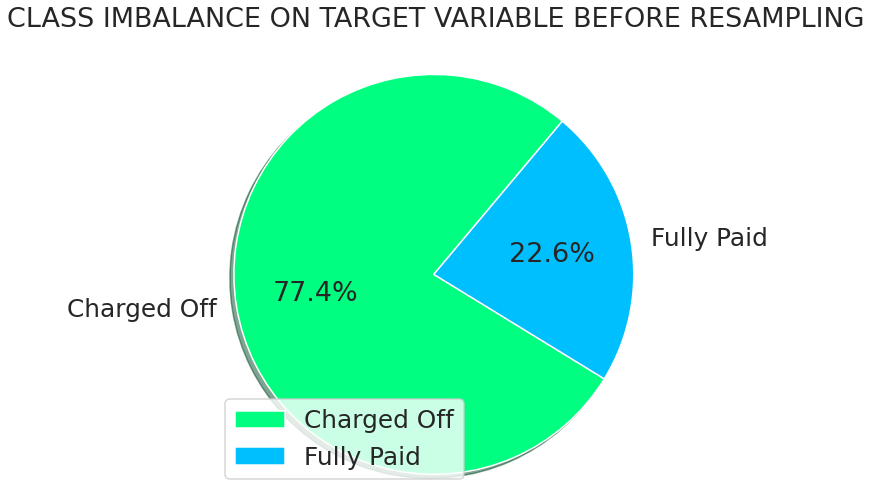

In [0]:
labels = ['Charged Off','Fully Paid']
colorses = ['#00ff80', '#00bfff']
# mpl.rcParams['font.size'] = 15.0
values = ['60202','17621']
# explode = (0, 0.6, 0, 0)
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=50,colors = colorses)
ax1.axis('equal')  

plt.title('CLASS IMBALANCE ON TARGET VARIABLE BEFORE RESAMPLING',pad=30)
plt.legend(labels,loc=3)

plt.show()


In [0]:
from sklearn.utils import resample

In [0]:
zero = train[train["Loan Status"]==0]
one = train[train["Loan Status"]==1]

In [0]:
len(zero)/len(train) * 100

22.633235889363615

In [0]:
zero_upsampled = resample(zero,
                          replace=True, # have to make duplicates
                          n_samples=len(one),
                          random_state=27) 

In [0]:
upsampled = pd.concat([one, zero_upsampled])

In [0]:
upsampled["Loan Status"].value_counts()

1    48167
0    48167
Name: Loan Status, dtype: int64

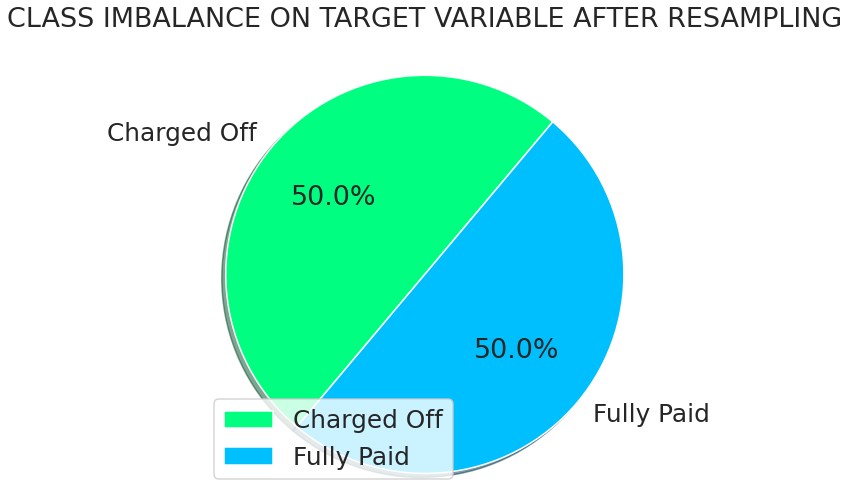

In [0]:
labels = ['Charged Off','Fully Paid']
colorses = ['#00ff80', '#00bfff']
# mpl.rcParams['font.size'] = 15.0
values = ['48167','48167']
# explode = (0, 0.6, 0, 0)
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=50,colors = colorses)
ax1.axis('equal')  

plt.title('CLASS IMBALANCE ON TARGET VARIABLE AFTER RESAMPLING',pad=30)
plt.legend(labels,loc=3)

plt.show()


In [0]:
X_train = train.drop(["Loan Status"],1)
Y_train = train["Loan Status"]

Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log = LogisticRegression()

In [0]:
log.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
Y_pred = log.predict(X_test)
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [0]:
confusion_matrix(Y_test, Y_pred)

array([[  686,  2844],
       [    0, 12035]])

In [0]:
accuracy_score(Y_test, Y_pred)

0.8172823642788307

In [0]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.19      0.33      3530
           1       0.81      1.00      0.89     12035

    accuracy                           0.82     15565
   macro avg       0.90      0.60      0.61     15565
weighted avg       0.85      0.82      0.77     15565



In [0]:
from sklearn.metrics import roc_curve, auc

In [0]:
Y_prob = log.predict_proba(X_test)[:,1]

In [0]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

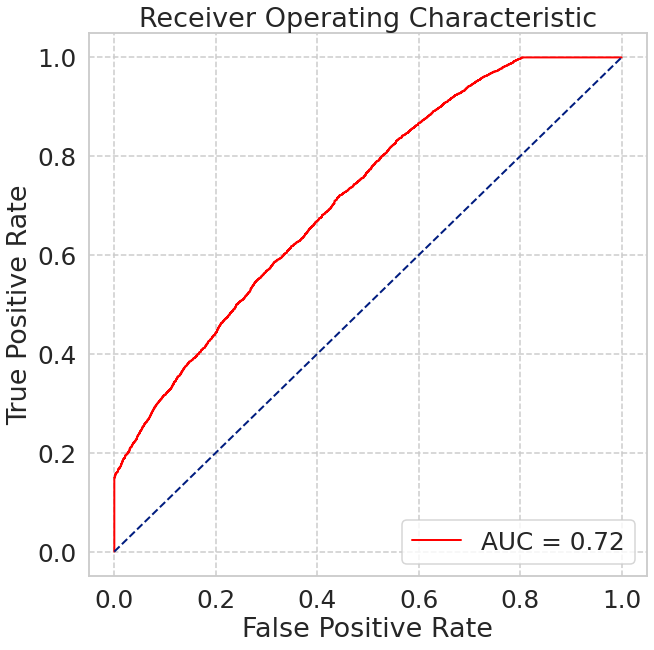

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)

In [0]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
Y_knn = knn.predict(X_test)

In [0]:
confusion_matrix(Y_test, Y_knn)

array([[ 1027,  2503],
       [  740, 11295]])

In [0]:
accuracy_score(Y_test, Y_knn)

0.7916479280436878

In [0]:
print(classification_report(Y_test, Y_knn))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39      3530
           1       0.82      0.94      0.87     12035

    accuracy                           0.79     15565
   macro avg       0.70      0.61      0.63     15565
weighted avg       0.76      0.79      0.76     15565



In [0]:
from sklearn.metrics import roc_curve, auc

In [0]:
Y_prob = knn.predict_proba(X_test)[:,1]

In [0]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

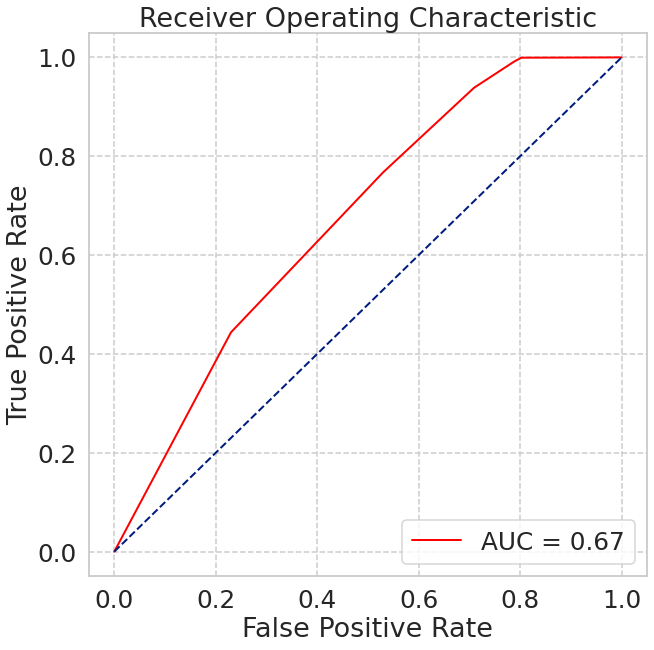

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
random = RandomForestClassifier()

In [0]:
random.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
Y_random = random.predict(X_test)

In [0]:
confusion_matrix(Y_test, Y_random)

array([[  867,  2663],
       [   99, 11936]])

In [0]:
accuracy_score(Y_test, Y_random)

0.822550594282043

In [0]:
print(classification_report(Y_test, Y_random))

              precision    recall  f1-score   support

           0       0.90      0.25      0.39      3530
           1       0.82      0.99      0.90     12035

    accuracy                           0.82     15565
   macro avg       0.86      0.62      0.64     15565
weighted avg       0.84      0.82      0.78     15565



In [0]:
from sklearn.metrics import roc_curve, auc

In [0]:
Y_prob = random.predict_proba(X_test)[:,1]

In [0]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

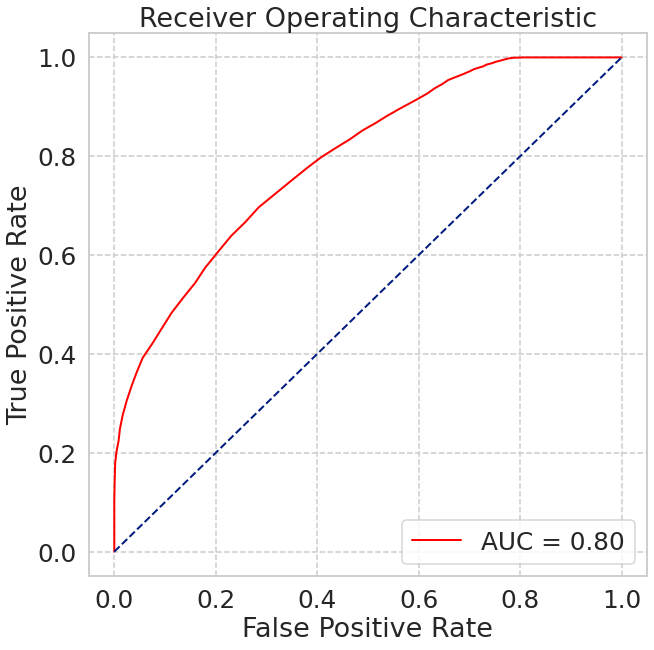

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')